In [2]:
# standard libraries
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# tf
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import initializers

# datetime for manipulating date and time
import datetime

# scipy
import scipy.stats as stats
from scipy.optimize import curve_fit

random.seed(2)

## Data Preprocessing

In [16]:
# Load data
df_realtor_zip_monthly_historical = pd.read_csv("../Data/realtor_zip_monthly_historical.csv")
df_realtor_zip_monthly_current = pd.read_csv("../Data/realtor_zip_monthly_current.csv")
df_realtor_zip_monthly_current.head()

/var/folders/jr/dnsfm9kj2575clb1_33r_09w0000gn/T/ipykernel_32297/2696334772.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_realtor_zip_monthly_historical = pd.read_csv("../Data/realtor_zip_monthly_historical.csv")
/var/folders/jr/dnsfm9kj2575clb1_33r_09w0000gn/T/ipykernel_32297/2696334772.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_realtor_zip_monthly_current = pd.read_csv("../Data/realtor_zip_monthly_current.csv")


,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202408,55033,"hastings, mn",439900.0,-0.0601,-0.0971,50.0,0.2195,0.4925,32.0,...,529676.0,-0.1118,0.0571,108.0,0.1077,0.3252,1.12,-0.2580,-0.3278,0.0
1,202408,98936,"moxee, wa",435000.0,0.0182,0.1918,2.0,-0.5000,-0.5556,26.0,...,442250.0,0.0595,0.0681,7.0,-0.3333,-0.0667,2.00,0.2500,1.3333,1.0
2,202408,61030,"forreston, il",197450.0,0.1967,1.0514,4.0,0.3333,1.6667,29.0,...,208450.0,0.3196,1.1657,7.0,0.7500,1.3333,1.00,0.3333,0.3333,1.0
3,202408,50244,"slater, ia",328500.0,-0.1511,-0.1987,1.0,-0.6667,-0.7500,87.0,...,327725.0,-0.1177,-0.2319,9.0,-0.1429,0.8000,7.00,4.6667,6.7500,1.0
4,202408,27544,"kittrell, nc",374900.0,0.0443,0.2528,3.0,-0.1429,-0.2500,54.0,...,377967.0,0.0000,-0.3887,6.0,-0.2500,0.5000,1.00,-0.2857,0.7500,1.0


In [15]:
#basic eda
historicalshape = np.shape(df_realtor_zip_monthly_historical)
currentshape = np.shape(df_realtor_zip_monthly_current)
print('shape of historical data:',historicalshape)
print('shape of current month data:',currentshape)

shape of historical data: (2853387, 40)
shape of current month data: (29037, 40)


In [40]:
# Change data types of columns to correct types
min(df_realtor_zip_monthly_historical['active_listing_count'])
max(df_realtor_zip_monthly_historical['active_listing_count'])
#df_realtor_zip_monthly_historical['month_date_yyyymm'] = pd.to_datetime(df_realtor_zip_monthly_historical)

2646.0

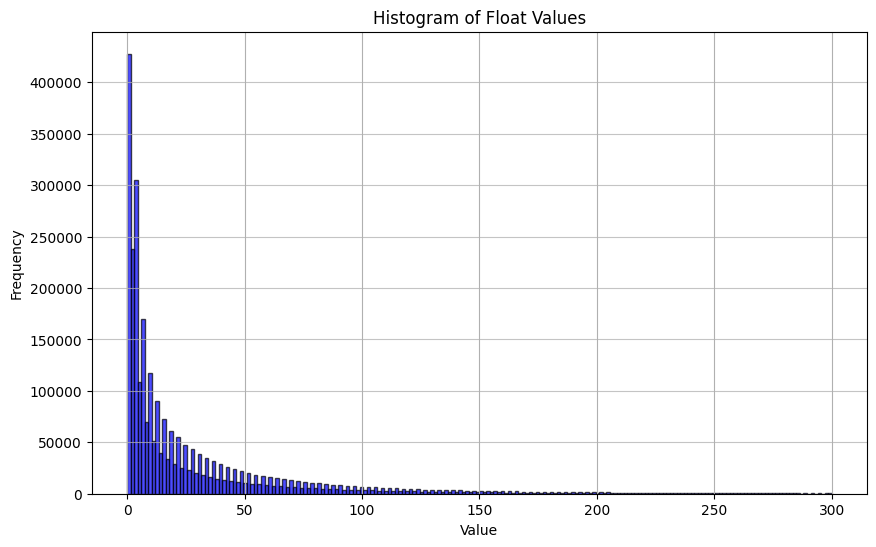

In [50]:
plt.figure(figsize=(10, 6))
df_realtor_zip_monthly_historical['active_listing_count'].hist(bins=200, color='blue', alpha=0.7, edgecolor='black', range=(0, 300))
plt.title('Histogram of Float Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

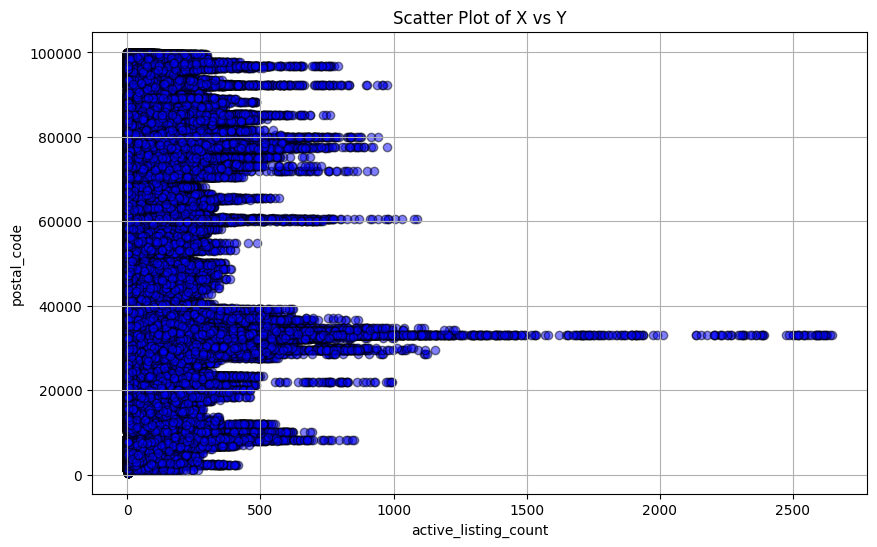

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df_realtor_zip_monthly_historical['active_listing_count'], df_realtor_zip_monthly_historical['postal_code'], color='blue', alpha=0.5, edgecolor='black')
plt.title('Scatter Plot of X vs Y')
plt.xlabel('active_listing_count')
plt.ylabel('postal_code')
plt.grid()
plt.show()

In [43]:
df_realtor_zip_monthly_historical['active_listing_count']

0          14.0
1          29.0
2          13.0
3           5.0
4           3.0
           ... 
2853382     1.0
2853383     1.0
2853384    10.0
2853385    22.0
2853386     NaN
Name: active_listing_count, Length: 2853387, dtype: float64

In [44]:
x = np.random.normal(170, 10, 250)
type(x)

numpy.ndarray